In [2]:
#Loading the libraries
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define the base folder
base_folder = "E:\Time analysis"

In [4]:
# Initialize an empty list to store the data
data = []

In [5]:
# Iterate over each subfolder in the base folder
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
     # Iterate over each sub-subfolder in the subfolder
        for subsubfolder in os.listdir(subfolder_path):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)
    
            if os.path.isdir(subsubfolder_path):
                
                # Construct the path to the _anavs_solution_pos_llh.csv file
                csv_file_path = os.path.join(subsubfolder_path, "pos_llh.csv")
                
            
                if os.path.isfile(csv_file_path):
                 
                    # Read the CSV file
                    df = pd.read_csv(csv_file_path)

                    # Print the first few rows for debugging
                    print(f"Reading file: {csv_file_path}")
                    # print(df.head())

                                       
                    # Rename the unnamed timestamp column to 'timestamps'
                    if df.columns[0].strip().lower() == 'unnamed: 0':
                        df.rename(columns={df.columns[0]: 'timestamps'}, inplace=True)
                    
                    
                    # Ensure the 'timestamps' column exists
                    timestamp_col = None
                    for col in df.columns:
                        if col.strip().lower() == 'timestamps':
                            timestamp_col = col
                            break
                    
                    if timestamp_col:
                        # Convert the 'timestamps' column to datetime
                        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
                        
                        # Calculate the duration
                        start_time = df[timestamp_col].min()
                        end_time = df[timestamp_col].max()
                        duration = (end_time - start_time).total_seconds() / 60  # Convert seconds to minutes
                        
                        # Store the result in the data list
                        data.append({
                            'file_path': csv_file_path,
                            'duration_minutes': duration
                        })
                    else:
                        print(f"Timestamps column not found in {csv_file_path}")
                else:
                    print(f"File not found: {csv_file_path}")

Reading file: E:\Time analysis\2023_04_21\Test1_13_51_C-R\pos_llh.csv
Reading file: E:\Time analysis\2023_04_21\Test2_14_24_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_04_21\Test3_16_46_C-R\pos_llh.csv
Reading file: E:\Time analysis\2023_04_21\Test4_17_21_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_04_26\Test1_15_53_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_04_26\Test2_16_30_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_04_27\Test1_09_58_C-R\pos_llh.csv
Reading file: E:\Time analysis\2023_04_27\Test2_10_32_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_05_03\Test1_10_32_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_05_03\Test2_15_42_C-R\pos_llh.csv
Reading file: E:\Time analysis\2023_05_03\Test3_16_03_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_05_03\Test4_17_40_C-R\pos_llh.csv
Reading file: E:\Time analysis\2023_05_03\Test5_17_58_R-C\pos_llh.csv
Reading file: E:\Time analysis\2023_05_04\Test1_09_44_C-R\pos_llh.csv
Reading file: E:\Tim

In [6]:
# Create a DataFrame from the data
result_df = pd.DataFrame(data)

In [7]:
result_df

,file_path,duration_minutes
0,E:\Time analysis\2023_04_21\Test1_13_51_C-R\po...,26.774138
1,E:\Time analysis\2023_04_21\Test2_14_24_R-C\po...,30.223763
2,E:\Time analysis\2023_04_21\Test3_16_46_C-R\po...,33.386971
3,E:\Time analysis\2023_04_21\Test4_17_21_R-C\po...,32.465921
4,E:\Time analysis\2023_04_26\Test1_15_53_R-C\po...,30.187404
5,E:\Time analysis\2023_04_26\Test2_16_30_R-C\po...,23.388429
6,E:\Time analysis\2023_04_27\Test1_09_58_C-R\po...,26.262313
7,E:\Time analysis\2023_04_27\Test2_10_32_R-C\po...,25.006328
8,E:\Time analysis\2023_05_03\Test1_10_32_R-C\po...,23.050322
9,E:\Time analysis\2023_05_03\Test2_15_42_C-R\po...,17.839112


In [8]:
# Display the DataFrame
print(result_df)

print("Finished processing files.")

                                            file_path  duration_minutes
0   E:\Time analysis\2023_04_21\Test1_13_51_C-R\po...         26.774138
1   E:\Time analysis\2023_04_21\Test2_14_24_R-C\po...         30.223763
2   E:\Time analysis\2023_04_21\Test3_16_46_C-R\po...         33.386971
3   E:\Time analysis\2023_04_21\Test4_17_21_R-C\po...         32.465921
4   E:\Time analysis\2023_04_26\Test1_15_53_R-C\po...         30.187404
5   E:\Time analysis\2023_04_26\Test2_16_30_R-C\po...         23.388429
6   E:\Time analysis\2023_04_27\Test1_09_58_C-R\po...         26.262313
7   E:\Time analysis\2023_04_27\Test2_10_32_R-C\po...         25.006328
8   E:\Time analysis\2023_05_03\Test1_10_32_R-C\po...         23.050322
9   E:\Time analysis\2023_05_03\Test2_15_42_C-R\po...         17.839112
10  E:\Time analysis\2023_05_03\Test3_16_03_R-C\po...         16.435396
11  E:\Time analysis\2023_05_03\Test4_17_40_C-R\po...         15.339634
12  E:\Time analysis\2023_05_03\Test5_17_58_R-C\po...         16

In [11]:
# Save the DataFrame as a CSV file
output_csv_path = "C:/Users/yekat/Documents/duration_data_for_Swaraj_v2.csv"
result_df.to_csv(output_csv_path, index=False)

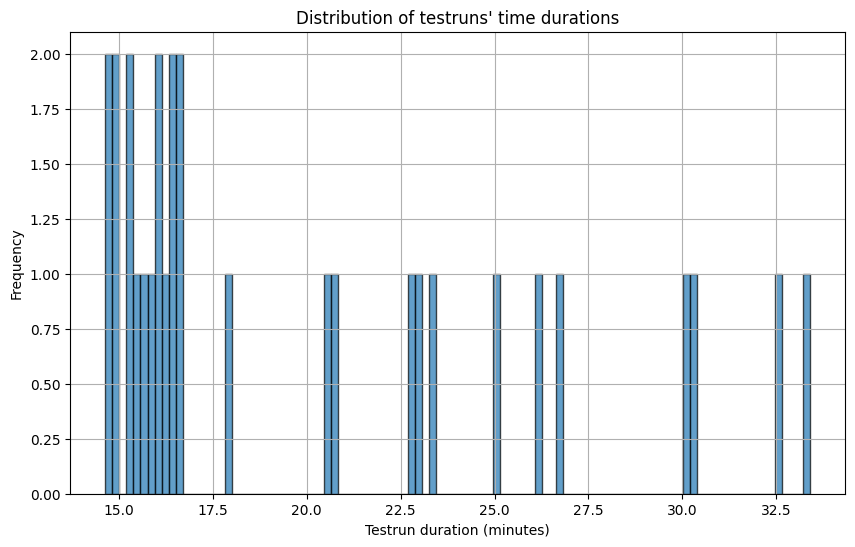

In [13]:
#Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(result_df['duration_minutes'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of testruns\' time durations')
plt.xlabel('Testrun duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)